In [5]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [6]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [9]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [10]:
import findspark
findspark.init()

In [11]:
! pip install chart_studio

     |████████████████████████████████| 71kB 5.8MB/s 


In [12]:
from pyspark.sql.types import *
from pyspark.sql.functions import * 

In [13]:
import numpy as np
import pandas as pd
from io import StringIO

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pyspark
from pyspark.sql import SparkSession

In [18]:
spark = SparkSession.builder.appName('SparkML_1').getOrCreate()

In [19]:
spark

In [20]:
! pip install chart_studio

In [21]:
bankDataSchema = StructType([
                 StructField("seqId",IntegerType(),True),
                 StructField("age",IntegerType(),True),
                 StructField("job",StringType(),True),
                 StructField("maritalStatus",StringType(),True),
                 StructField("education",StringType(),True),
                 StructField("default",StringType(),True),
                 StructField("balance",DoubleType(),True),
                 StructField("housing",StringType(),True),
                 StructField("loan",StringType(),True),
                 StructField("contact",StringType(),True),
                 StructField("day",IntegerType(),True),
                 StructField("month",StringType(),True),
                 StructField("duration",DoubleType(),True),
                 StructField("campaign",DoubleType(),True),
                 StructField("pdays",DoubleType(),True),
                 StructField("previous",DoubleType(),True),
                 StructField("poutcome",StringType(),True),
                 StructField("opened_new_td_act_yes_no",StringType(),True)
                 ])

In [22]:
bankDF = spark.read.format('csv')\
.option('header','false')\
.option('inferSchema','true')\
.load("/content/drive/My Drive/BigData/spark2020/bank_data.csv", schema=bankDataSchema)

In [23]:
% time
spark.conf.set("spark.sql.execution.arrow.enabled","false")
pdf = pd.DataFrame(np.random.rand(100,3))
sparkdf = spark.createDataFrame(pdf)

result_df = sparkdf.select("*").toPandas()
result_df.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 10.7 µs


,0,1,2
0,0.120408,0.304737,0.849109
1,0.419317,0.669662,0.165568
2,0.900682,0.974140,0.083813
3,0.394541,0.613149,0.295657
4,0.126392,0.409064,0.606512


In [24]:
bankDF.printSchema()

root
 |-- seqId: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- maritalStatus: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: double (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: double (nullable = true)
 |-- pdays: double (nullable = true)
 |-- previous: double (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_yes_no: string (nullable = true)



In [25]:
bankDF.dtypes

[('seqId', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('maritalStatus', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'double'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'double'),
 ('pdays', 'double'),
 ('previous', 'double'),
 ('poutcome', 'string'),
 ('opened_new_td_act_yes_no', 'string')]

In [26]:
bankDF.show(3)

+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|seqId|age|       job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 1001| 30|unemployed|      married|  primary|     no| 1787.0|     no|  no|cellular| 19|  oct|    79.0|     1.0| -1.0|     0.0| unknown|                      no|
| 1002| 33|  services|      married|secondary|     no| 4789.0|    yes| yes|cellular| 11|  may|   220.0|     1.0|339.0|     4.0| failure|                      no|
| 1003| 35|management|       single| tertiary|     no| 1350.0|    yes|  no|cellular| 16|  apr|   185.0|     1.0|330.0|     1.0| failure|                      no|
+-----+---+----------+------

In [27]:
bankDF.cache()

DataFrame[seqId: int, age: int, job: string, maritalStatus: string, education: string, default: string, balance: double, housing: string, loan: string, contact: string, day: int, month: string, duration: double, campaign: double, pdays: double, previous: double, poutcome: string, opened_new_td_act_yes_no: string]

In [28]:
bankDF.take(2)

[Row(seqId=1001, age=30, job='unemployed', maritalStatus='married', education='primary', default='no', balance=1787.0, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79.0, campaign=1.0, pdays=-1.0, previous=0.0, poutcome='unknown', opened_new_td_act_yes_no='no'),
 Row(seqId=1002, age=33, job='services', maritalStatus='married', education='secondary', default='no', balance=4789.0, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220.0, campaign=1.0, pdays=339.0, previous=4.0, poutcome='failure', opened_new_td_act_yes_no='no')]

In [29]:
len(bankDF.columns)

18

In [30]:
bankDF.count()

4521

In [31]:
bankDF = bankDF.drop('seqId')

In [32]:
len(bankDF.columns)

17

In [33]:
bankDF.describe().show()

+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|summary|               age|    job|maritalStatus|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|opened_new_td_act_yes_no|
+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|  count|              4521|   4521|         4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|                    4521|
|   mean| 41.1700951

In [34]:
bankDF.describe().select('summary','age','loan','balance','pdays').show()

+-------+------------------+----+------------------+------------------+
|summary|               age|loan|           balance|             pdays|
+-------+------------------+----+------------------+------------------+
|  count|              4521|4521|              4521|              4521|
|   mean| 41.17009511170095|null|1422.6578190665782|39.766644547666445|
| stddev|10.576210958711263|null|3009.6381424673395|100.12112444301656|
|    min|                19|  no|           -3313.0|              -1.0|
|    max|                87| yes|           71188.0|             871.0|
+-------+------------------+----+------------------+------------------+



In [35]:
bankDF.agg(*(min(col(c)).alias(c) for c in bankDF.columns)).show()

+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|   job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|admin.|     divorced|  primary|     no|-3313.0|     no|  no|cellular|  1|  apr|     4.0|     1.0| -1.0|     0.0| failure|                      no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [36]:
bankDF.where(bankDF.balance < 0).count()

366

In [37]:
from pyspark.sql.functions import when 
bankDF = bankDF.withColumn('balance',when(bankDF.balance>0,bankDF.balance).otherwise(0))
zerobalanceDF = bankDF.where(bankDF.balance < 0)
zerobalanceDF.count()

0

In [38]:
bankDF.createOrReplaceTempView('bankDFTable')

In [39]:
resultDF = spark.sql("""
 SELECT opened_new_td_act_yes_no, COUNT(*) AS count
 FROM bankDFTable
 GROUP BY opened_new_td_act_yes_no
""")

In [40]:
resultDF.show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [41]:
bankDF.groupBy("opened_new_td_act_yes_no").count().show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio
import plotly
chart_studio.tools.set_credentials_file(username='jmulmoodi',api_key='5LnjpAb3Fn4e8lybI6IU')
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go
import warnings
### Initialize settings 
sns.set_style('whitegrid')
sns.set(color_codes=True)
warnings.filterwarnings('ignore')
pyoff.init_notebook_mode(connected=True)
get_ipython().magic('matplotlib inline')

In [43]:
pdDF = resultDF.toPandas()
data = [
        go.Bar(
            x=pdDF['opened_new_td_act_yes_no'],
            y=pdDF['count']
        )

]
layout = go.Layout(title='Term Deposit Yes/No Counts')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,fileName='28Feb21_1')

### Other variables that could be considered for exploratory data analysis

loan vs opened_new_td_act_yes_no</br>
marital_status vs opened_new_td_act_yes_no</br>
job vs opened_new_td_act_yes_no</br>
education </br>
Divorced,married, single </br>

In [45]:
resultDF = bankDF.crosstab('opened_new_td_act_yes_no','loan')

In [46]:
resultDF.show()

+-----------------------------+----+---+
|opened_new_td_act_yes_no_loan|  no|yes|
+-----------------------------+----+---+
|                          yes| 478| 43|
|                           no|3352|648|
+-----------------------------+----+---+



In [47]:
pdDF = resultDF.toPandas()

In [48]:
pdDF.columns = ['opened_new_td_act_yes_no_loan','No_Existing_loan','Existing_loan']

In [49]:
data = [
     go.Bar(
            x=['Opted_for_loan','No_opted_loan'],
            y=pdDF['No_Existing_loan'],
            name='No Existing Loans'
        ),
     go.Bar(
         x = ['Opted_for_loan','No_opted_loan'],
         y = pdDF['Existing_loan'],
         name = 'Existing Loans'
     ) 
]
layout=go.Layout(
    title='Exsiting/Non-existing loans - Counts',
    barmode='group'
)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)  

In [50]:
### For different job categories 
resultDF = spark.sql("""
SELECT 
   job,
   COUNT(*) AS term_deposit_yes_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "yes"
   GROUP BY job
""")

In [51]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_yes_cnt']
       ) 
]
layout = go.Layout(title="Term deposit counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [52]:
### For different job categories 
resultDF = spark.sql("""
SELECT 
   job,
   COUNT(*) AS term_deposit_no_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "no"
   GROUP BY job
""")

In [53]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_no_cnt']
       ) 
]
layout = go.Layout(title="Term deposit counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [54]:
resultDF = bankDF.filter(expr("opened_new_td_act_yes_no='yes'")).groupBy("education").count()
resultDF.show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown|   19|
| tertiary|  193|
|secondary|  245|
|  primary|   64|
+---------+-----+



In [55]:
pdDF = resultDF.toPandas()
data = [
      go.Bar(
          x = pdDF['education'],
          y = pdDF['count']
      )  
]
layout = go.Layout(title="Term deposit opted count in each education level")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [56]:
bankDF_pd = bankDF.toPandas()
bankDF_pd.head()

,age,job,maritalStatus,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,opened_new_td_act_yes_no
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no


In [57]:
correlations = bankDF_pd.corr()
correlations

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.084202,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.084202,1.000000,-0.007595,-0.015195,-0.010840,0.008616,0.026031
day,-0.017853,-0.007595,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015195,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.010840,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.008616,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026031,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [58]:
trace = go.Heatmap(z=[correlations['age'],correlations['balance'],
                      correlations['day'],correlations['duration'],
                      correlations['campaign'],
                      correlations['pdays'],correlations['previous']],
                   x = ['age','balance','day','duration','campaign','pdays','previous'],
                   y = ['age','balance','day','duration','campaign','pdays','previous'])
data = [trace]
layout = go.Layout(title='HeatMap')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [59]:
bankDF.select([count(when(isnan(c) | col(c).isNull(),c).otherwise(None)).alias(c) for c in bankDF.columns]).show()

+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|job|maritalStatus|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|  0|  0|            0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|                       0|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [60]:
data_df = bankDF.na.drop(how="any")
print("Count of the  records in the datset before dropping null values ", bankDF.count())
print("Count of the records in the dataset after dropping null values", data_df.count())

Count of the  records in the datset before dropping null values  4521
Count of the records in the dataset after dropping null values 4521


In [61]:
(trainingData,testingData) = bankDF.randomSplit([0.7,0.3])

In [62]:
data_df = bankDF.na.drop(how="any")
print("Count of the  records in the datset before dropping null values ", bankDF.count())
print("Count of the records in the dataset after dropping null values", data_df.count())

Count of the  records in the datset before dropping null values  4521
Count of the records in the dataset after dropping null values 4521


In [63]:
(trainingData,testingData) = bankDF.randomSplit([0.7,0.3])

In [64]:
trainingData.show(4)

+---+-------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+-------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|student|       single|  primary|     no|  103.0|     no|  no|cellular| 10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|secondary|     no|  302.0|     no|  no|cellular| 16|  jul|   205.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|  unknown|     no|    0.0|     no|  no|cellular| 11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 19|student|       single|  unknown|     no| 1169.0|     no|  no|cellular|  6|  f

In [65]:
testingData.show(4)

+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|     job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 20| student|       single|secondary|     no|  291.0|     no|  no|telephone| 11|  may|   172.0|     5.0|371.0|     5.0| failure|                      no|
| 21|services|       single|secondary|     no| 1903.0|    yes|  no|  unknown| 29|  may|   107.0|     2.0| -1.0|     0.0| unknown|                      no|
| 21| student|       single|secondary|     no| 2488.0|     no|  no| cellular| 30|  jun|   258.0|     6.0|169.0|     3.0| success|                     yes|
| 21| student|       single|secondary|     no| 6844.0|     no|  no| ce

In [66]:
cat_Var_names = ['job','maritalStatus','education','default','housing','day','contact','month','poutcome']
num_var_names = ['age','balance','duration','previous','pdays','campaign']

In [67]:
from pyspark.ml.feature import VectorAssembler
vector_assembler_numVars = VectorAssembler(inputCols=num_var_names , outputCol="num_features_all")

In [68]:
from pyspark.ml.feature import MinMaxScaler
min_max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all",outputCol="scaled_num_features")

In [69]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers_Cat = [StringIndexer(inputCol=cat_var_name,outputCol="{0}_index".format(cat_var_name))
                for cat_var_name in cat_Var_names]

encoders_Cat = [OneHotEncoder(inputCol=indexer.getOutputCol(),outputCol="{0}_vec".format(indexer.getInputCol())) for indexer in indexers_Cat]

assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders_Cat],outputCol="cat_features")
assembler = VectorAssembler(inputCols=["scaled_num_features","cat_features"],outputCol="features")

In [70]:
indexer_Label = StringIndexer(inputCol="opened_new_td_act_yes_no",outputCol="label")

In [71]:
preprocessingStages = [vector_assembler_numVars] + [min_max_Scalar_NumVars] + indexers_Cat + encoders_Cat + [assembler_Cat] + [assembler] + [indexer_Label]

In [72]:
type(preprocessingStages)

list

In [73]:
preprocessingStages

[VectorAssembler_9227d2be350f,
 MinMaxScaler_83ffed39894e,
 StringIndexer_ef8c6eacd170,
 StringIndexer_3f3cadfc4ff9,
 StringIndexer_307f6d203154,
 StringIndexer_dca025a04e6a,
 StringIndexer_8c2af3350b06,
 StringIndexer_54976628325a,
 StringIndexer_c99de8d832a9,
 StringIndexer_cdb181462576,
 StringIndexer_fb9e71273abf,
 OneHotEncoder_1dc413cdff92,
 OneHotEncoder_ae80b323564d,
 OneHotEncoder_30bcfe2b7617,
 OneHotEncoder_ad6a40e0c1b4,
 OneHotEncoder_0f52c5911cc4,
 OneHotEncoder_8c2e427feda5,
 OneHotEncoder_de80d2b8edc5,
 OneHotEncoder_0c8e00231954,
 OneHotEncoder_ebd14d61497c,
 VectorAssembler_99277ee90f2f,
 VectorAssembler_5bee074e2852,
 StringIndexer_3a31f80f6db4]

In [74]:
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(maxIter=10,labelCol="label",featuresCol="features")
from pyspark.ml import Pipeline
lr_pipeline = Pipeline(stages=preprocessingStages+[lr])
lr_pipeline_model = lr_pipeline.fit(trainingData)

In [75]:
lr_pipeline_model.stages[-1].coefficients

DenseVector([0.0157, -0.6743, 12.7224, 0.8482, 0.5633, -4.4762, 0.1393, -0.1669, -0.1356, 0.0099, 0.1118, 0.655, 0.1861, -0.4836, -0.6925, -0.4029, 0.5423, -0.5691, -0.5545, 0.1642, 0.1885, 0.1, 0.5938, -0.3799, -0.6797, 0.5366, -1.1891, -0.9809, 0.7858, -0.0191, 0.3811, -0.6795, -0.4977, -0.5006, 0.4166, 0.1039, 0.1999, -1.2036, 0.2429, -0.0357, -0.0554, 0.0658, 0.2146, -0.1155, 0.1167, -0.1126, -0.1117, 0.3605, 0.0919, 0.367, 0.8766, 0.0061, 0.3867, 0.4414, 0.4176, -0.9905, -0.2481, -0.7374, -0.1379, 0.8696, -0.3725, 0.5188, 0.4592, -0.5985, 1.9392, 1.1519, 1.6215, -1.7148, -1.9171, -1.5898])

In [76]:
lr_pipeline_model.stages[-1].intercept

-1.9580120874059526

In [77]:
train_predictions_lr = lr_pipeline_model.transform(trainingData)

In [78]:
train_predictions_lr.select('features').show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                            |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,5,16,18,21,22,52,54,57,67],[0.00144687306849469,0.03278145695364238,0.02040816326530612,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                  |
|(70,[1,2,16,18,19,22,38,54,57,67],[0.00424228802607181,0.06622516556291391,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                                        |
|(70,[2,5,16,18,22,39,54,62,67],[0.0390728476821192,0.04081632653061224,1.0,1.0,1.0,1

In [79]:
train_predictions_lr.show()

+---+----------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+---------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+--------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|       job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|day_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|        day_vec|  contact_vec|     month_

In [80]:
test_predictions_lr = lr_pipeline_model.transform(testingData)

In [81]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lr = train_predictions_lr.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_lr = evaluator.evaluate(predictionAndLabels_train_lr)
print("Training Set Accuracy = ",train_accuracy_lr)
print("Training error ", 1-train_accuracy_lr)

Training Set Accuracy =  0.8960100534087339
Training error  0.10398994659126615


In [82]:
predictionAndLabels_test_lr = test_predictions_lr.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
test_accuracy_lr = evaluator.evaluate(predictionAndLabels_test_lr)
print("Testing Set Accuracy = ",test_accuracy_lr)
print("Testing error ", 1-test_accuracy_lr)

Testing Set Accuracy =  0.9125560538116592
Testing error  0.08744394618834084


In [83]:
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()

In [84]:
true_positive

55

In [85]:
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()

In [86]:
true_negative

1166

In [87]:
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()

In [88]:
false_positive

36

In [89]:
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()

In [90]:
false_negative

81

In [91]:
precission = true_positive/float(true_positive + false_positive)

In [92]:
precission

0.6043956043956044

In [93]:
true_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
print ("TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precission = true_positive / float(true_positive + false_positive)
print ("Precission: ", precission)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precission * recall)/float(precission + recall))))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
print ("TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precission = true_positive / float(true_positive + false_positive)
print ("Precission: ", precission)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precission * recall)/float(precission + recall))))

TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 124
True Negatives: 2728
False Positives: 70
False Negatives: 261
Total 3183
Precission:  0.6391752577319587
Recall:  0.3220779220779221
F1 Score:  0.4283246977547495
*****************************************************************************
TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 55
True Negatives: 1166
False Positives: 36
False Negatives: 81
Total 3183
Precission:  0.6043956043956044
Recall:  0.40441176470588236
F1 Score:  0.4845814977973568


In [94]:
train_pred_pandas = predictionAndLabels_train_lr.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_lr.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions)

              Not Approved  Approved
Not Approved          2728        70
Approved               261       124


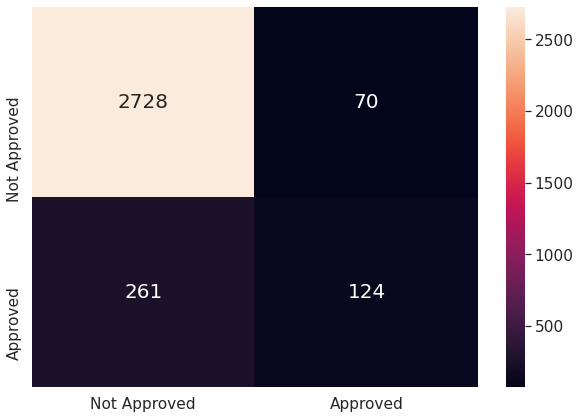

In [95]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})